# Logistic Regression Project Exercise 

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

### Exploratory Data Analysis and Visualization
---
- Perform EDA and explain each graph

### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


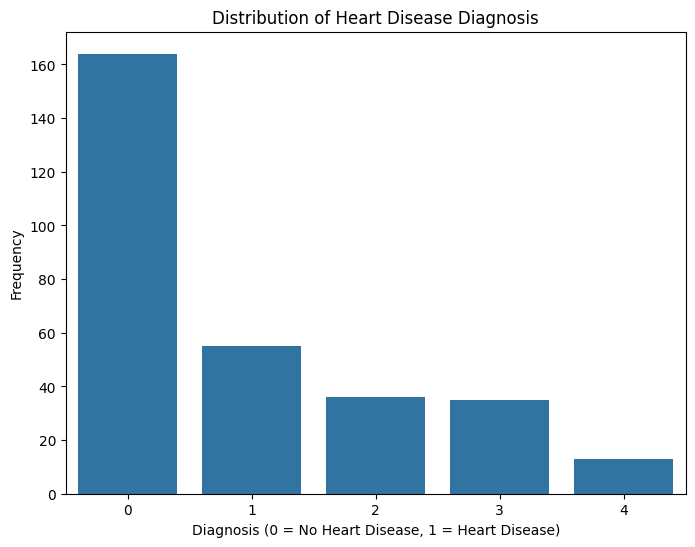

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the heart disease dataset
heart_disease_dataset = fetch_ucirepo(id=45)

# Extract features and target
features = heart_disease_dataset.data.features
target = heart_disease_dataset.data.targets

# Combine features and target into one DataFrame
data = features.copy()
data['num'] = target

# Display the first few rows of the DataFrame
print(data.head())

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='num')
plt.title('Distribution of Heart Disease Diagnosis')
plt.xlabel('Diagnosis (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Frequency')
plt.show()

# Display the resulting DataFrame
data.head()


**TASK: Create a pairplot that displays the relationships between the following columns:**

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


<Figure size 1200x800 with 0 Axes>

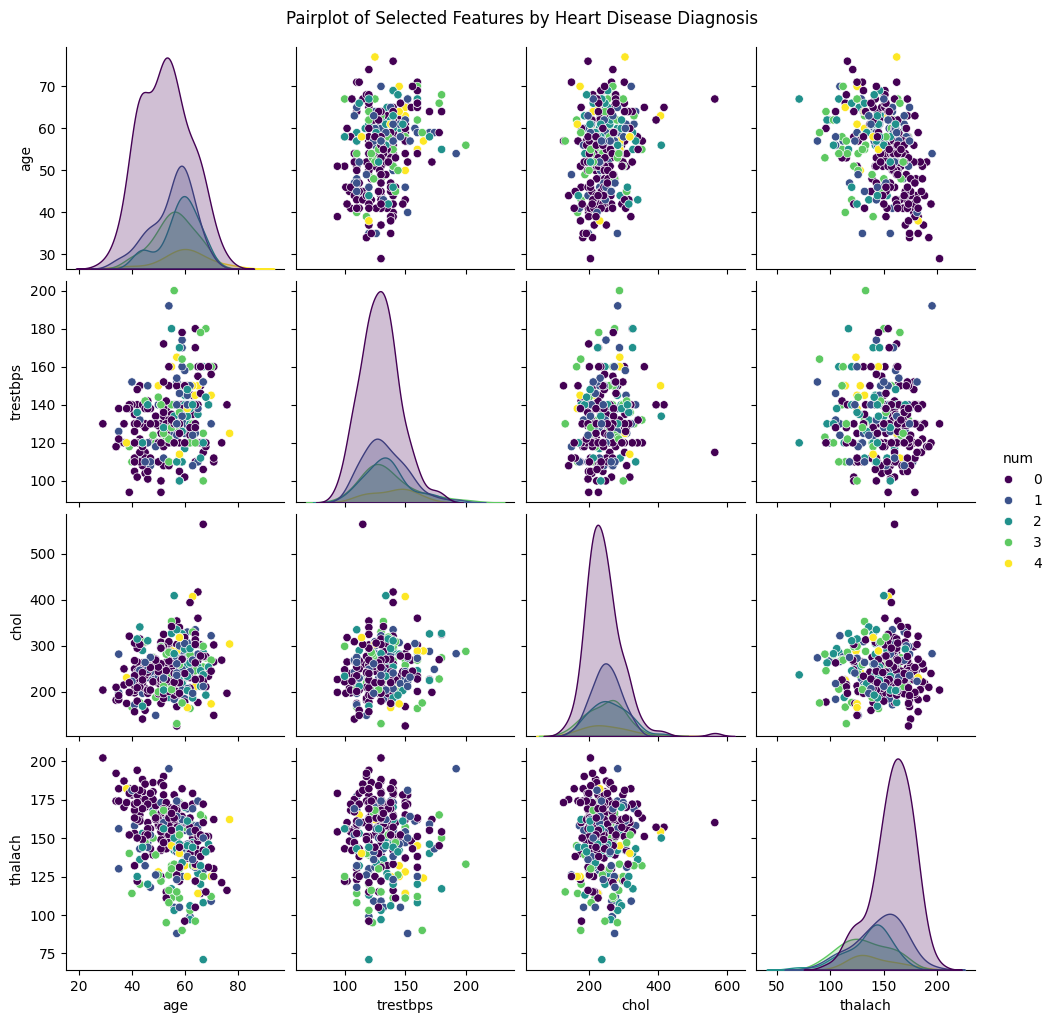

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the heart disease dataset
heart_disease_dataset = fetch_ucirepo(id=45)

# Extract features and target
features = heart_disease_dataset.data.features
target = heart_disease_dataset.data.targets

# Combine features and target into one DataFrame
data = features.copy()
data['num'] = target

# Display the first few rows of the DataFrame
print(data.head())

# Select specific columns for the pairplot
columns_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'num']

# Create a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(data[columns_to_plot], hue='num', palette='viridis')
plt.suptitle('Pairplot of Selected Features by Heart Disease Diagnosis', y=1.02)
plt.show()

# Display the resulting DataFrame
data.head()

**TASK: Create a heatmap that displays the correlation between all the columns.**

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


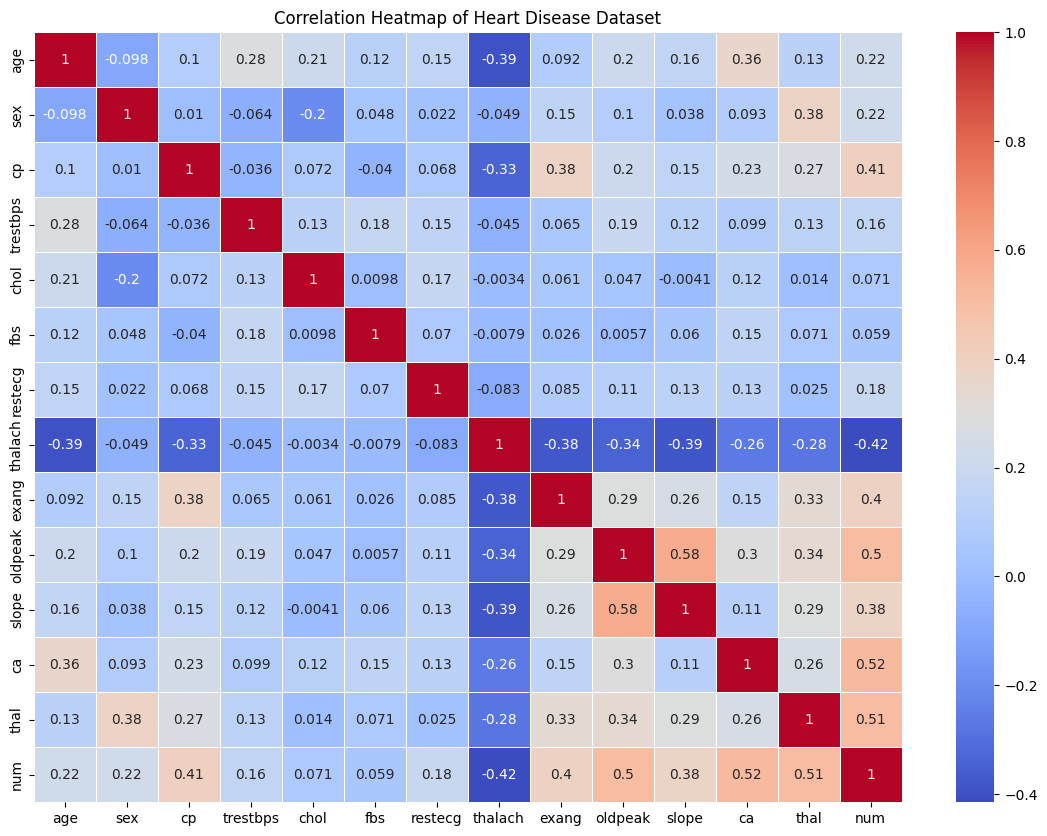

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the heart disease dataset
heart_disease_dataset = fetch_ucirepo(id=45)

# Extract features and target
features = heart_disease_dataset.data.features
target = heart_disease_dataset.data.targets

# Combine features and target into one DataFrame
data = features.copy()
data['num'] = target

# Display the first few rows of the DataFrame
print(data.head())

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()


# Modeling Task

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the heart disease dataset
heart_disease_dataset = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease_dataset.data.features
y = heart_disease_dataset.data.targets

# Verify the separation
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Target (y):
   num
0    0
1    2
2    1
3    0
4    0


**TASK: Perform a train test split on the data, with the test size of 5% and a random_state of 0.**

In [5]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

# Verify the split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (287, 13)
Testing features shape: (16, 13)
Training labels shape: (287, 1)
Testing labels shape: (16, 1)


**TASK: Create a StandardScaler object and normalize the X train and test set feature data.**

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nan_indices = np.isnan(X_train_scaled).any(axis=1)

X_train_scaled_clean = X_train_scaled[~nan_indices]
y_train_clean = y_train[~nan_indices]

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [11]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train_scaled)

lr_cv = LogisticRegressionCV(Cs=10, cv=5, random_state=0, max_iter=1000)

lr_cv.fit(X_train_scaled_clean, y_train_clean)

best_C = lr_cv.C_[0]
print("Best C value:", best_C)

Best C value: 0.3593813663804626


c:\Users\bryce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [12]:
best_C = lr_cv.C_[0]
print("Optimal C value:", best_C)

Optimal C value: 0.3593813663804626


### Coeffecients

**TASK: Report back the model's coefficients.**

In [13]:
coefficients = lr_cv.coef_

# Print the coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")

Model Coefficients:
age: 0.009594707729307862
sex: -0.3005907477300181
cp: -0.4676632245395007
trestbps: -0.2983964024967241
chol: -0.2578292907123662
fbs: 0.23784053756283857
restecg: -0.1500774484202452
thalach: 0.27382032352964764
exang: -0.3296135679046283
oldpeak: -0.40686403093313495
slope: -0.3538448286483714
ca: -0.9829579151294979
thal: -0.6983814433241115


**Task: Create a visualization of the coefficients.**

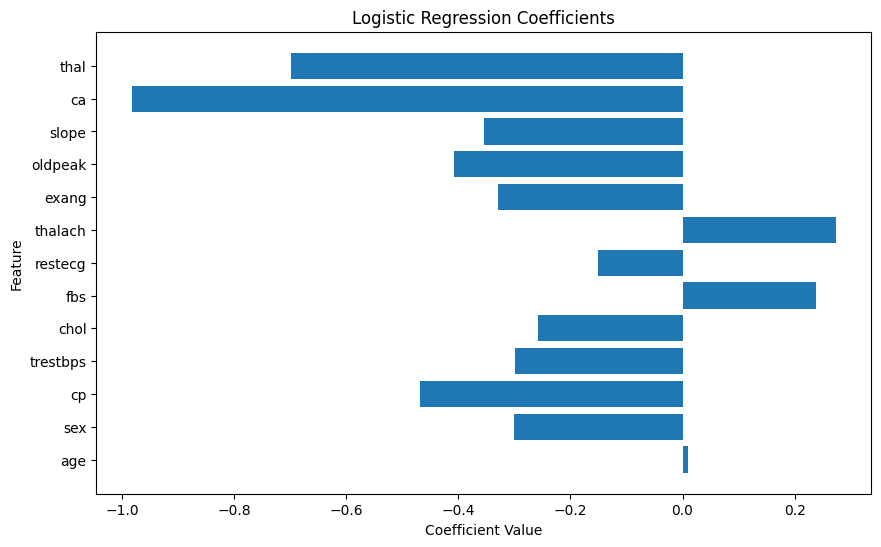

In [14]:
import matplotlib.pyplot as plt

coefficients = lr_cv.coef_[0]

feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

---------

## Model Performance Evaluation

**TASK: Evaluate your model on the remaining 5% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test data
test_score = lr_cv.score(X_test_scaled, y_test)
print("Accuracy on test data:", test_score)

# Generate predictions on the test data
y_pred = lr_cv.predict(X_test_scaled)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix Array:")
print(conf_matrix)

Accuracy on test data: 0.375

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.26      0.24      0.24        16
weighted avg       0.37      0.38      0.36        16


Confusion Matrix Array:
[[5 0 2 0]
 [2 1 1 0]
 [2 0 0 1]
 [0 1 1 0]]


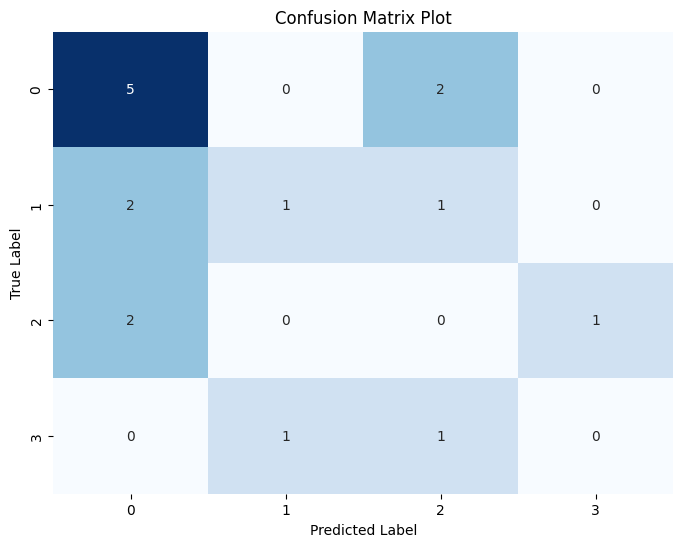

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.26      0.24      0.24        16
weighted avg       0.37      0.38      0.36        16



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions on the test data
y_pred = lr_cv.predict(X_test_scaled)

# Generate a confusion matrix array
conf_matrix_array = confusion_matrix(y_test, y_pred)

# Generate a confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_array, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Plot')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

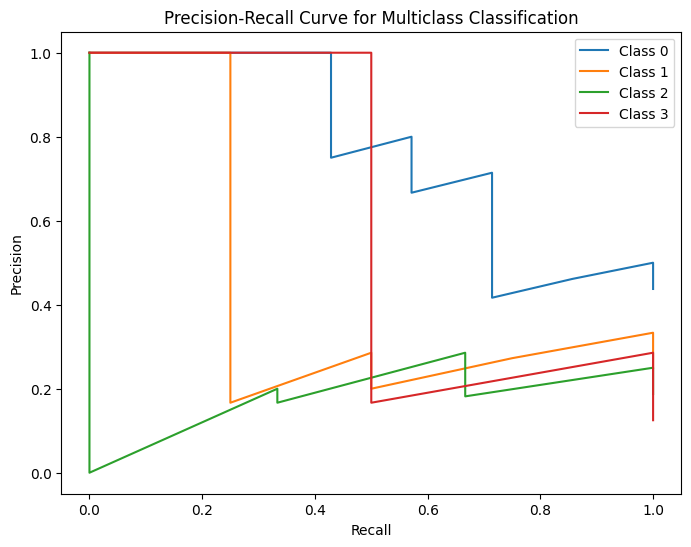

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the labels
classes=[0, 1, 2, 3]
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], lr_cv.predict_proba(X_test_scaled)[:, i])

# Plot Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc='best')
plt.show()